In [36]:
#Imports 
import pip
import glob, os
from sklearn import svm 
import scipy.io as sc
import numpy as np
from HelperFunctions_ import write_dataset_to_file, split_dataset_paths, subFrame, preprocesing_data, combinePictures, combineModels, classesInLabels, combineLabelClasses, lessBands, reshape_sj
import sys 
from spectral import *

import tables as tab
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from sklearn import datasets
import copy
import spectral


In [37]:
#Finding path names 
Mjosa_data = split_dataset_paths("../Datasets/2022_07_11_Mjosa/2022_07_11_Mjosa/", ["he5", "csv", "jpg"])
Andebu_data = split_dataset_paths("../Datasets/2021_07_21_Andebu/2021_07_21_Andebu/", ["he5", "csv", "jpg"])
Telemark_data = split_dataset_paths("../Datasets/2020_06_23_Telemarkskanalen/2020_06_23_Telemarkskanalen/", ["he5", "csv", "jpg"])

samson_data = split_dataset_paths("../Datasets/samson/", ["mat"])
jasper_data = split_dataset_paths("../Datasets/jasper/", ["mat"])



In [38]:
#Amount of dataset should be handled
N_datasets = 4

#Open files 
open_files_array = []
for i in range(N_datasets):
    file = tab.open_file(Mjosa_data["he5"][i])
    open_files_array.append(file.get_node("/HDFEOS/SWATHS/PRS_L1_HCO/")['Data Fields']['VNIR_Cube'][:,5:,:])

#Load the labels 
load_labels_array = []
for i in range(N_datasets):
    file = Mjosa_data["csv"][i]
    load_labels_array.append(np.loadtxt(file, dtype=np.ubyte))

In [4]:
data = open_files_array[0]
labels = load_labels_array[0]
print(len(labels.flatten()))

1000000


In [39]:
samson = sc.loadmat(samson_data["mat"][1])["V"]
samson_gt = sc.loadmat(samson_data["mat"][0])
samson_labels = np.argmax(samson_gt['A'].T.reshape((-1,3)), axis=1)

jasper = sc.loadmat(jasper_data["mat"][1])["Y"]
jasper_gt = sc.loadmat(jasper_data["mat"][0])
jasper_labels = np.argmax(jasper_gt['A'], axis=0)


In [40]:

new_new_samson = reshape_sj(samson)

X = new_new_samson.transpose(0,2,1).reshape((-1,156))
X = preprocessing.scale(X, axis=0)
print(len(X))

y = samson_labels.flatten()

9025


In [9]:
classesInLabels(y)

[2, 0, 1]

In [10]:
# split samson into train test sets
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(X,y, test_size=0.999, random_state=1)
print(s_X_train.shape, s_X_test.shape, s_y_train.shape, s_y_test.shape)

svm = SVC(kernel="linear")
svm.fit(s_X_train, s_y_train)

svm.score(s_X_test, s_y_test)

(9, 156) (9016, 156) (9,) (9016,)


0.8614685004436557

In [11]:
#svm_samson.score(s_X_test, s_y_test)
Xout = svm.predict(X)

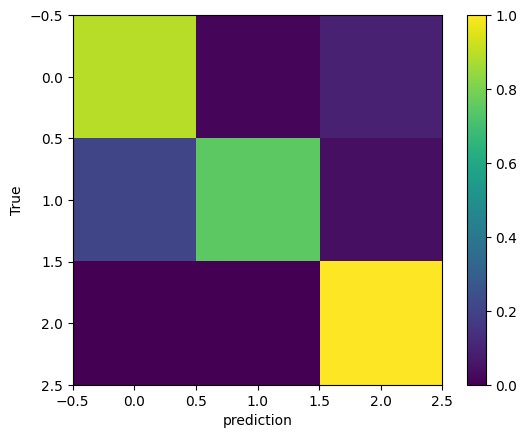

In [12]:
cm = confusion_matrix(y_true = y, y_pred = Xout, normalize='true')

plt.imshow(cm, vmax=1, vmin=0) 
plt.ylabel('True')
plt.xlabel('prediction')
plt.colorbar()

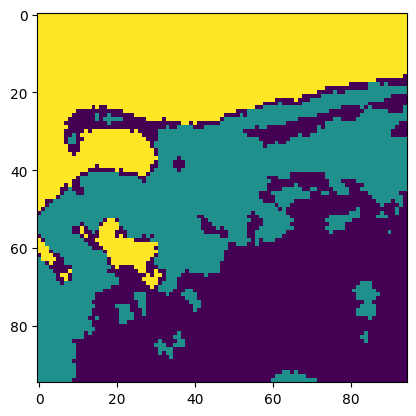

In [13]:
plt.imshow(Xout.reshape((95,95)))

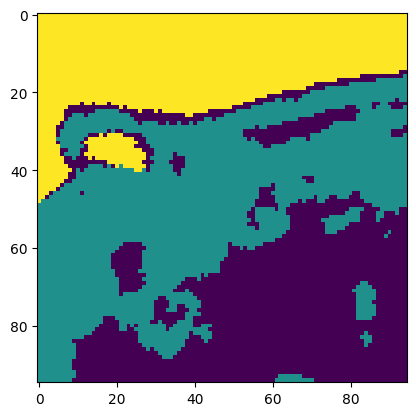

In [14]:
plt.imshow(samson_labels.reshape((95,95)))

In [15]:
seperation = {0 : [[1,2,3], [4,5,6]] , 1 : [[[1,2], [3]],[[4], [5,6]]]}

def DesicionTree(data, labels, class_tree): 

    svm_branches = {}
    
    for branch in class_tree: 
        svm = SVC()
        
    return 0 

In [8]:
X = new_jasper.transpose(0,2,1).reshape((-1,198))
X = preprocessing.scale(X, axis=0)
print(len(X))

y = jasper_labels.flatten()

NameError: name 'new_jasper' is not defined

In [ ]:
# split samson into train test sets
j_X_train, j_X_test, j_y_train, j_y_test = train_test_split(X,y, test_size=0.999, random_state=1)
print(j_X_train.shape, j_X_test.shape, j_y_train.shape, j_y_test.shape)

svm = SVC(kernel="linear")
svm.fit(j_X_train, j_y_train)

svm.score(j_X_test, j_y_test)

(10, 198) (9990, 198) (10,) (9990,)


0.7954954954954955

In [7]:
#svm_samson.score(s_X_test, s_y_test)
Xout = svm.predict(X)

AttributeError: module 'sklearn.svm' has no attribute 'predict'

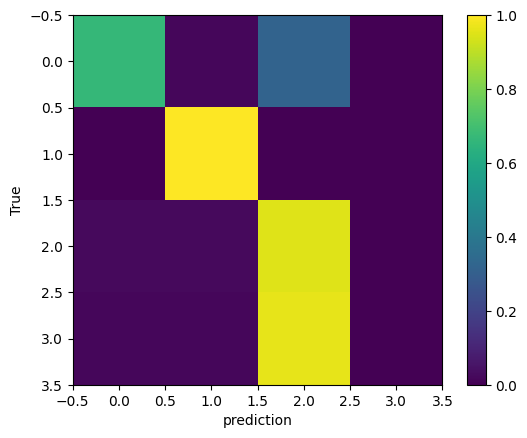

In [ ]:
cm = confusion_matrix(y_true = y, y_pred = Xout, normalize='true')

plt.imshow(cm, vmax=1, vmin=0) 
plt.ylabel('True')
plt.xlabel('prediction')
plt.colorbar()

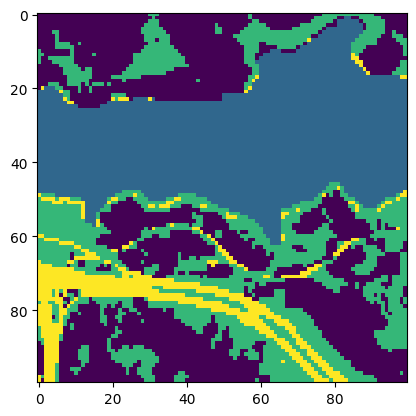

In [ ]:
plt.imshow(jasper_labels.reshape((100,100)))

In [10]:
new_new_samson = reshape_sj(samson)

X = new_new_samson.transpose(0,2,1).reshape((-1,156))
X = preprocessing.scale(X, axis=0)
print(len(X))

y = samson_labels.flatten()



9025


In [11]:
#Desion tree implementation 
train = copy.deepcopy(X)
labels = copy.deepcopy(samson_labels)

labels[labels == 1] = 0 
svm_al = SVC(kernel="rbf")
svm_al.fit(train, labels.flatten())

x_train = train[samson_labels != 2]
labels2 = samson_labels[samson_labels != 2]

svm_be = SVC(kernel="rbf")
svm_be.fit(x_train, labels2)

SVC()

In [49]:
# split samson into train test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.999, random_state=1)

In [53]:
# Test the predicted yout data vs the true y data. 
yout = svm_al.predict(train)
yout2 = svm_be.predict(x_train)

print((yout==labels).sum()/len(labels))
#(yout4==y[y != 2]).sum()/len(y[y != 2])
print((yout2 == labels2).sum()/len(labels2))

0.9904709141274238
0.9802424786708577


In [44]:
classesInLabels(yout)

[1, 0]

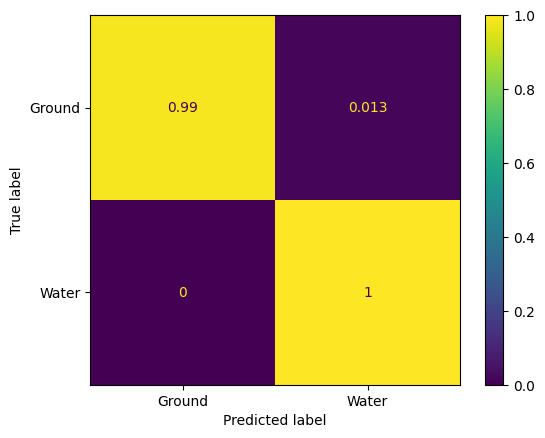

In [54]:
name_classes = ["Ground", "Water"]


cm = confusion_matrix(labels,yout, normalize="true") 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=name_classes)
cmd_obj.plot()

In [21]:
print(len(yout))
print(len(yout2))

print(classesInLabels(yout))
print(classesInLabels(yout2))

#print(len(yout[yout == 0]))

count = len(yout2) - len(yout[yout == 0]) 
print(count)

jump_over = 0

for i in range(len(yout)): 
    if(yout[i] == 0): 
        if(jump_over < 10): 
            yout[i] = yout2[jump_over]
            jump_over += 1 
            count += 1
        else: 
            yout[i] = yout2[count]
            count += 1

print(count)

9025
6681
[2, 0]
[0, 1]
86
6681


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

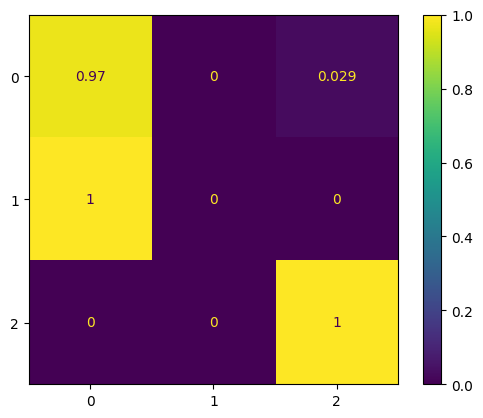

In [32]:
name_classes = ["Ground", "Water"]


cm = confusion_matrix(y,yout, normalize="true") 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=name_classes)
cmd_obj.plot()

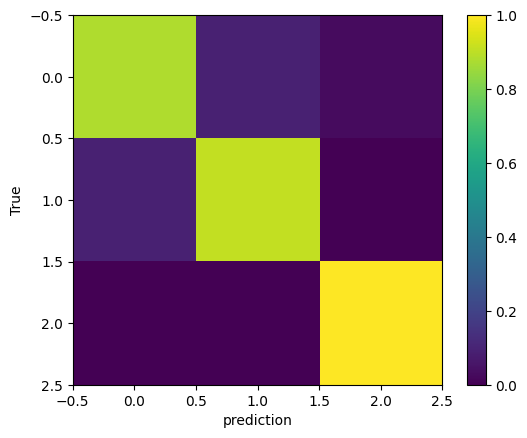

In [23]:
cm = confusion_matrix(y_true = y, y_pred = yout, normalize='true')

plt.imshow(cm, vmax=1, vmin=0) 
plt.ylabel('True')
plt.xlabel('prediction')
plt.colorbar()

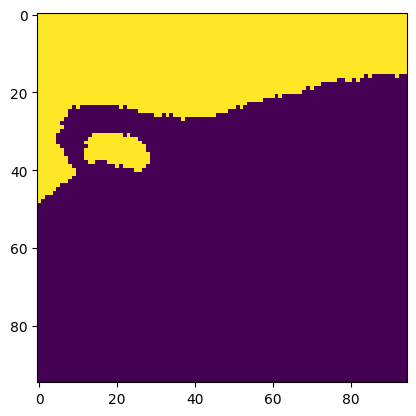

In [55]:
plt.imshow(yout.reshape((95,95)))

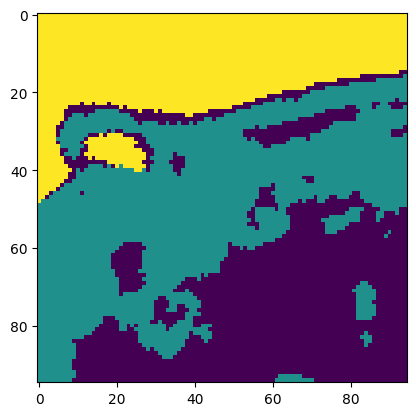

In [25]:
plt.imshow(y.reshape((95,95)))

In [ ]:
# Test the predicted yout data vs the true y data. 
(yout==y).sum()/len(y)

0.9233240997229917

In [42]:
new_jasper = reshape_sj(jasper)

X = new_jasper.transpose(0,2,1).reshape((-1,198))
X = preprocessing.scale(X, axis=0)
print(len(X))

y = jasper_labels.flatten()


10000


In [35]:
print(classesInLabels(y))

[0, 2, 1, 3]


In [9]:
classesInLabels(y)

array([0, 1, 2, 3], dtype=int64)

In [15]:
seperation = {0 : [[1,2,3], [4,5,6]] , 1 : [[[1,2], [3]],[[4], [5,6]]]}

In [4]:
print(len(seperation[0]))
print(len(seperation[1]))

2
2


In [120]:
def SeperateDataLabels(data,labels, seperation): 

    train_data = copy.deepcopy(data)
    train_labels = copy.deepcopy(labels)

    #Check the labels and the seperation have the same number of classes or not 
    # Will remove the classes not in the seperation array. 
    
    if(len(seperation) == 2): 

        classesInSeperation = []

        for i in range(len(seperation)): 
            for j in range(len(seperation[i])): 
                if(not(seperation[i][j] in classesInSeperation)): 
                    classesInSeperation.append(seperation[i][j])

        classesInSeperation.sort()
        classesInSeperation = np.array(classesInSeperation)
        cIL = np.array(classesInLabels(labels))

        #Checks if the seperation and the labels have same amount of classes. If not return -1 ????
        if(not(np.array_equal(cIL, classesInSeperation))): 

            for i in range(len(cIL)): 
                if(not(cIL[i] in classesInSeperation)):
                    train_data = train_data[train_labels != cIL[i]]
                    train_labels = train_labels[train_labels != cIL[i]]

        for i in range(len(seperation)): 
            for j in range(len(seperation[i])):
                if(seperation[i][j] != min(seperation[i])):
                    
                    train_labels[train_labels == seperation[i][j]] = min(seperation[i])
        
        return train_data, train_labels
        
    else: 
        print("The seperation needs to be 2 in length. For 1v1 classification")
        return -1


In [145]:
def BranchDataLabels(data, labels, tree_branches): 

    """
    Takes in data and labes for the SVM Desion Tree. 
    Makes the labels for every branch 1v1 classes. 

    """

    if(len(tree_branches) > 0): 
        if(len(tree_branches[0]) == 2): 

            #Seperating the classes on the first branch of the data and the labels.
            data_and_labels_branches = {0 : SeperateDataLabels(data, labels, tree_branches[0])}
            
            for i in range(1,len(tree_branches)): 
                data_and_labels = []
                for j in range(len(tree_branches[i])): 
                    if(len(tree_branches[i][j]) == 2):
                            data_and_labels.append(SeperateDataLabels(data,labels,tree_branches[i][j]))
                    else: 
                        data_and_labels.append([])
                data_and_labels_branches[i] = data_and_labels

            return data_and_labels_branches
        
        else: 
            return -1

In [166]:
def SvmBranchModelTrain(data_and_labels_branches): 

    svm_branch_models = {}

    svm = SVC()
    train_data, train_labels = data_and_labels_branches[0]
    svm.fit(train_data, train_labels)
    svm_branch_models[0] = svm

    for i in range(1,len(data_and_labels_branches)): 
        svm_models = []
        for j in range(len(data_and_labels_branches[i])): 
            if(len(data_and_labels_branches[i][j]) == 2): 
                train_data, train_labels = data_and_labels_branches[i][j]
                svm = SVC()
                svm.fit(train_data, train_labels)
                svm_models.append(svm)
            else: 
                svm_models.append(False)
        svm_branch_models[i] = svm_models

    return svm_branch_models


In [169]:
def SvmBranchModelPredict(data_and_labels_branches, svm_branch_models): 
    predicted_branch_labels = {}

    svm = svm_branch_models[0]
    train_data, train_labels = data_and_labels_branches[0]
    yout = svm.predict(train_data)
    predicted_branch_labels[0] = yout

    for i in range(1,len(data_and_labels_branches)): 
        predicted_labels = []
        for j in range(len(data_and_labels_branches[i])): 
            if(len(data_and_labels_branches[i][j]) == 2): 
                train_data, train_labels = data_and_labels_branches[i][j]
                svm = svm_branch_models[i][j]
                yout = svm.predict(train_data)
                predicted_labels.append(yout)
            else: 
                predicted_labels.append([])
        predicted_branch_labels[i] = predicted_labels

    return predicted_branch_labels


In [316]:

def combineLabels(predicted_labels, tree_branch): 

    pl = copy.deepcopy(predicted_labels)
    """
    Combine the result from the desion tree. Should be automated. 
    """
    #if(len(pl) == len(tree_branch)): 
    for i in range(len(pl)-2,0,-1): 
        for j in range(len(pl[i])): 
            for k in range(len(tree_branch[i][j])): 
                if([min(tree_branch[i][j][k])] in tree_branch[i+1][j]):

                    yout = pl[i][j] 
                    yout_sub_class = pl[i+1][j]

                    class_diff = np.abs(len(yout[yout == min(tree_branch[i][j][k])]) - len(yout_sub_class))
                    for x in range(len(yout)): 
                        if(yout[x] == min(tree_branch[i][j][k])):
                            if(class_diff < len(yout_sub_class)):
                                yout[x] = yout_sub_class[class_diff] 
                                class_diff += 1
                    pl[i][j] = yout

    #Collecting the labels from the second branch layer to the first layer. ¨
    #Cobime the two second layers to the final labeling. 
    
    yout_sub_1 = pl[1][0]
    yout_sub_2 = pl[1][1]
    yout = pl[0]

    if(yout_sub_1 == []): 
        class_diff = np.abs(len(yout[yout == min(tree_branch[0][1])]) - len(yout_sub_2))
        for x in range(len(yout)): 
            if(yout[x] == min(tree_branch[0][1])):
                if(class_diff < len(yout_sub_2)):
                    yout[x] = yout_sub_2[class_diff] 
                    class_diff += 1

    elif(yout_sub_2 == []): 
        class_diff = np.abs(len(yout[yout == min(tree_branch[0][0])]) - len(yout_sub_1))
        for x in range(len(yout)): 
            if(yout[x] == min(tree_branch[0][0])):
                if(class_diff < len(yout_sub_1)):
                    yout[x] = yout_sub_1[class_diff] 
                    class_diff += 1

    else:
        count_sub_1 = 0 
        count_sub_2 = 0 
        for x in range(len(yout)): 
            if(yout[x] == min(tree_branch[0][0])):
                    yout[x] = yout_sub_1[count_sub_1] 
                    count_sub_1 += 1
            if(yout[x] == min(tree_branch[0][1])): 
                    yout[x] = yout_sub_1[count_sub_2] 
                    count_sub_2 += 1

    return yout

In [228]:
for i in range(2,0, -1 ): 
    print(i)

2
1


In [317]:
#seperation = {0 : [[1,2,3], [4,5,6]] , 1 : [[[1,2], [3]],[[4], [5,6]]], 2 : [[[1], [2]], [[5], [6]]]}
#seperation = {0 : [[0,2,3],[1]], 1 : [[[0],[2,3]],[]], 2: [[[2],[3]],[]]}


def SvmDesionTree(data, labels, tree_branches):
    """
    Every branch in the SVM Desion Tree is aimed to be 1v1 classification. 
    """

    #Chekcs if the tree branches are valid by being over 1 in length 
    data_and_labels_branches = BranchDataLabels(data, labels, tree_branches)
    svm_branch_models = SvmBranchModelTrain(data_and_labels_branches)
    predicted_branch_labels = SvmBranchModelPredict(data_and_labels_branches, svm_branch_models)
    pl = combineLabels(predicted_branch_labels, tree_branches)

    #print(data_and_labels_branches[1][0])

    #print(svm_branch_models)
            
    #print(len(predicted_branch_labels[1][0]))

    #print(classesInLabels(pl[1][0]))

    #print(predicted_branch_labels[1][0][0])

    return pl

In [318]:
tb = {0: [[0,2,3],[1]], 1: [[[0],[2,3]], []], 2 : [[[2],[3]], []]}


pl = SvmDesionTree(X,y,tb)


print((pl == y).sum()/len(y))

0.8237


C:\Users\jonas\AppData\Local\Temp\ipykernel_12756\1355542885.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(yout_sub_1 == []):


In [319]:
print(classesInLabels(pl))

[0 1 2 3]


In [252]:
print([2] in [[2], [3]])

True


In [271]:
count = np.abs(len(yout2) - len(yout[yout == 0]))
print(count)

jump_over = 0

for i in range(len(yout)): 
    if(yout[i] == 0): 
        if(jump_over < 0): 
            yout[i] = yout2[jump_over]
            jump_over += 1
            count += 1
        else: 
            yout[i] = yout2[count]
            count += 1

print(count)

classesInLabels(yout)

5738
6674


array([0, 1, 2, 3], dtype=int64)

0
[[2], [3]]
2
[[2], [3]]
[0 2]


In [177]:
print([2] in [[2],[3]])

True


In [90]:
#seperation = {0 : [[1,2,3], [4,5,6]] , 1 : [[[1,2], [3]],[[4], [5,6]]]}

#print(seperation[0])

seperation = [[0,2,3],[1]]

stored_data, stored_labes = SeperateDataLabels(X,y,seperation)

In [87]:
print(classesInLabels(stored_labes))
print(classesInLabels(y))
print(len(stored_labes))

[0 3]
[0 1 2 3]
4246


In [45]:
print(stored_labes)

[0 0 0 ... 0 0 0]


In [184]:


#Desion tree implementation 
train = copy.deepcopy(X)
train2 = copy.deepcopy(X)
labels = copy.deepcopy(y)
labels2 = copy.deepcopy(y)

labels[labels == 2] = 0
labels[labels == 3] = 0 

y_labels2 = labels2[y != 1]
x_train2 = train2[labels2 != 1]

svm_ab = SVC(kernel="rbf", max_iter=1e5, C=1000)
svm_ab.fit(train, labels.flatten())

svm_cd = SVC(kernel="rbf", max_iter=1e5)
svm_cd.fit(x_train2, y_labels2.flatten())



SVC(max_iter=100000.0)

In [185]:
predicted_labels = svm_ab.predict(train)
print((predicted_labels == labels).sum()/len(labels))

1.0


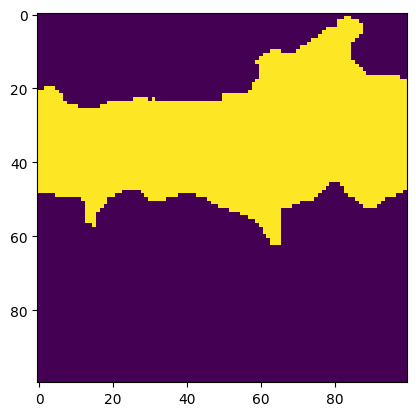

In [186]:
plt.imshow(predicted_labels.reshape((100,100)))

In [187]:
classesInLabels(y_labels2)

array([0, 2, 3], dtype=int64)

In [188]:
# Test the predicted yout data vs the true y data. 
yout = svm_ab.predict(train)
yout2 = svm_cd.predict(x_train2)


In [189]:
count = np.abs(len(yout2) - len(yout[yout == 0]))
print(count)

jump_over = 0

for i in range(len(yout)): 
    if(yout[i] == 0): 
        if(jump_over < 0): 
            yout[i] = yout2[jump_over]
            jump_over += 1
            count += 1
        else: 
            yout[i] = yout2[count]
            count += 1

print(count)

classesInLabels(yout)

0
6674


array([0, 1, 2, 3], dtype=int64)

In [190]:
print((yout==labels2).sum()/len(labels2))

0.9855


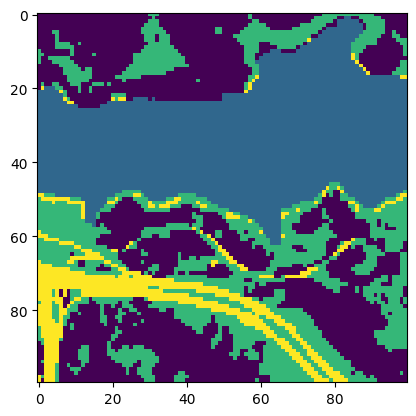

In [191]:
plt.imshow(yout.reshape((100,100)))

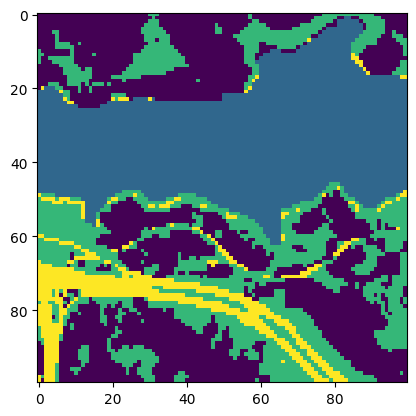

In [33]:
plt.imshow(labels2.reshape((100,100)))

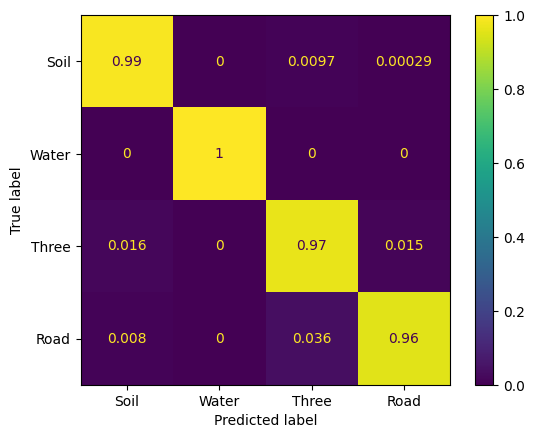

In [34]:
#1 Road, 2# Soil, #3, Water, #4 Three

name_classes = ["Soil", "Water", "Three", "Road"]


cm = confusion_matrix(labels2,yout, normalize="true") 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=name_classes)
cmd_obj.plot()